In [3]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-macosx_10_9_x86_64.whl size=1148110 sha256=d068696acc76615c78b471974695faf203b543a1afc558ddf8f783ee620e4e4b
  Stored in directory: /Users/fatimafayha/Library/Caches/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [4]:
import pandas as pd
import numpy as np
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

In [5]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
data = Dataset.load_from_file('ratings_small.csv', reader=reader)

In [6]:
pmf_svd = SVD()
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8954  0.8917  0.8970  0.8978  0.9022  0.8968  0.0034  
MAE (testset)     0.6902  0.6876  0.6928  0.6905  0.6944  0.6911  0.0023  
Fit time          0.36    0.37    0.38    0.37    0.40    0.38    0.01    
Test time         0.11    0.07    0.11    0.07    0.12    0.10    0.02    


In [7]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9678  0.9731  0.9605  0.9772  0.9620  0.9681  0.0064  
MAE (testset)     0.7439  0.7481  0.7383  0.7488  0.7429  0.7444  0.0038  
Fit time          0.03    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.71    0.77    0.72    0.77    0.71    0.74    0.03    


In [8]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9360  0.9333  0.9336  0.9269  0.9449  0.9349  0.0058  
MAE (testset)     0.7206  0.7199  0.7187  0.7160  0.7301  0.7211  0.0048  
Fit time          1.73    1.77    1.67    1.65    1.70    1.70    0.04    
Test time         3.04    3.06    3.09    3.06    3.06    3.06    0.01    


In [9]:
pmf = ('PMF', cv_pmf['test_mae'].mean(), cv_pmf['test_rmse'].mean())
user_cf = ('User based CF', cv_ub['test_mae'].mean(), cv_ub['test_rmse'].mean())
item_cf = ('Item based CF', cv_ib['test_mae'].mean(), cv_ib['test_rmse'].mean())

results = [pmf, user_cf, item_cf]

print("%-12s %12s %12s" % ('Algorithm', 'MAE Mean', 'RMSE Mean'))

for res in results:
  if res[0] == 'PMF':
    print("%-8s %14.3f %12.3f" % (res[0], res[1], res[2]))
  else:
    print("%-8s %9.3f %12.3f" % (res[0], res[1], res[2]))

Algorithm        MAE Mean    RMSE Mean
PMF               0.691        0.897
User based CF     0.744        0.968
Item based CF     0.721        0.935


In [10]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['RMSE', 'MAE']
run_results = {
    'ucf': dict(),
    'icf': dict()
}

for similarity in similarities:
  user_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  item_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_user_based_cf = cross_validate(user_based_cf, data, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_item_based_cf = cross_validate(item_based_cf, data, measures, verbose=True, cv=5)

  run_results['ucf'][similarity] = cross_validate_user_based_cf
  run_results['icf'][similarity] = cross_validate_item_based_cf

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9967  0.9913  0.9976  0.9939  0.9859  0.9931  0.0042  
MAE (testset)     0.7701  0.7652  0.7695  0.7675  0.7652  0.7675  0.0021  
Fit time          0.05    0.05    0.06    0.06    0.05    0.06    0.00    
Test time         0.71    0.72    0.71    0.71    0.71    0.71    0.00    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [11]:
plot_data = {
    'mae': {
      'cosine': [],
      'msd': [],
      'pearson': []
    },
    'rmse': {
      'cosine': [],
      'msd': [],
      'pearson': []
    }
}

for k, v in run_results.items():
  for key, result in run_results[k].items():
    plot_data['mae'][key].append(result['test_mae'].mean())
    plot_data['rmse'][key].append(result['test_rmse'].mean())

In [12]:
plot_data

{'mae': {'cosine': [0.7675036018412988, 0.7745110185776976],
  'msd': [0.7456888538532633, 0.7215394827332933],
  'pearson': [0.7724996983113784, 0.7679666459476825]},
 'rmse': {'cosine': [0.9930613631425593, 0.994878682122119],
  'msd': [0.9700546907208946, 0.9352521065626075],
  'pearson': [0.9979119033140709, 0.9893040499138037]}}

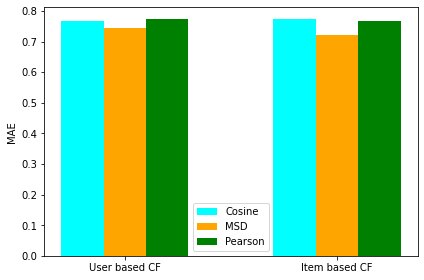

In [13]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['mae']['cosine'], width, color='cyan')
plt.bar(x, plot_data['mae']['msd'], width, color='orange')
plt.bar(x+0.2, plot_data['mae']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

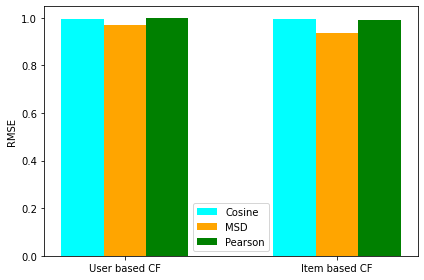

In [14]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['rmse']['cosine'], width, color='cyan')
plt.bar(x, plot_data['rmse']['msd'], width, color='orange')
plt.bar(x+0.2, plot_data['rmse']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

In [15]:
min_k_value = 1
mean = 99999
ucf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0546  1.0559  1.0594  1.0642  1.0562  1.0581  0.0034  
MAE (testset)     0.8472  0.8485  0.8511  0.8531  0.8491  0.8498  0.0021  
Fit time          0.04    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.24    0.31    0.24    0.24    0.24    0.26    0.03    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [16]:
min_k_value = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  icf_k_results.append(curr_mean)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0588  1.0571  1.0513  1.0650  1.0582  1.0581  0.0044  
MAE (testset)     0.8511  0.8506  0.8425  0.8555  0.8494  0.8498  0.0042  
Fit time          1.69    1.69    1.67    1.62    1.61    1.66    0.03    
Test time         1.36    1.41    1.41    1.41    1.39    1.40    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

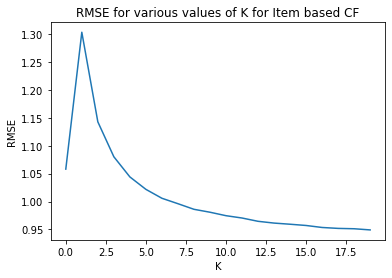

In [17]:
plt.plot(icf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for Item based CF")
plt.show()

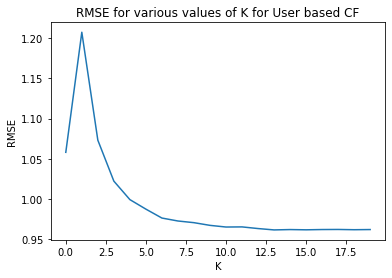

In [18]:
plt.plot(ucf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF")
plt.show()

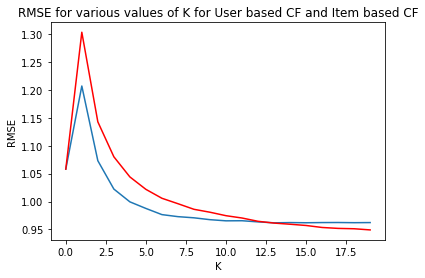

In [19]:
plt.plot(ucf_k_results)
plt.plot(icf_k_results, color='r')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.show()
